In [1]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


character(0)

In telecom, R is used for customer churn analysis, network traffic analysis and predicting service outages. It helps telecom companies optimize customer retention and improve service offerings.

Customer churn is an important concern for the telecom industry, as retaining customers is just as important as acquiring new ones. In this article we will be analyzing a dataset related to customer churn to derive insights into why customers leave and what can be done to retain them.

# Project Overview
The primary goal of this project is to understand the factors that influence customer churn in the telecom industry. By identifying these factors, telecom companies can implement targeted interventions to retain customers. This has broader implications, helping telecom companies improve profitability, customer satisfaction and community stability through reliable services.

# Understanding the Dataset
The dataset contains columns such as customer ID, gender, senior citizen, Partner, Dependents, tenure, phone service, Internet service, Churn and other telecom customer-related information.

Dataset: Telecom Customer Churn

1. Load Packages and Data
* In this step, we will load the necessary libraries and read the dataset. We will check the first few rows of the data to understand its structure. The head(churn_data) function in R displays the first six rows of the "churn_data" dataframe. This function is useful for quickly inspecting the structure and contents of the dataframe to understand what kind of data it contains.

In [2]:


library(dplyr)
library(tidyverse)
library(ggplot2)

churn_data <- read.csv("/kaggle/input/telecom-dataset/telco.csv")
head(churn_data)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,⋯,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>
1,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,⋯,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
2,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,⋯,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,⋯,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,⋯,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
5,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,⋯,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
6,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,⋯,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes


From this initial glance, we can see that the dataset contains both categorical and numerical data, such as customer information, service types and billing methods. This forms the basis for understanding patterns related to customer churn.

2. Performing Exploratory Data Analysis (EDA)
* EDA is a process of describing and summarizing data to bring important aspects into focus for further analysis.

2.1. Checking for Missing Values
* We begin by checking for missing values and printing the dimensions of the dataset.

* colSums(is.na(churn_data)) counts the number of missing values in each column.
dim(churn_data) give the dimensions of the dataset.

In [3]:
mis_val <- (colSums(is.na(churn_data)))
print("Missing Values in All columns")
print(mis_val)

print("Dimesnions of the dataset")
print(dim(churn_data))

[1] "Missing Values in All columns"
      customerID           gender    SeniorCitizen          Partner 
               0                0                0                0 
      Dependents           tenure     PhoneService    MultipleLines 
               0                0                0                0 
 InternetService   OnlineSecurity     OnlineBackup DeviceProtection 
               0                0                0                0 
     TechSupport      StreamingTV  StreamingMovies         Contract 
               0                0                0                0 
PaperlessBilling    PaymentMethod   MonthlyCharges     TotalCharges 
               0                0                0               11 
           Churn 
               0 
[1] "Dimesnions of the dataset"
[1] 7043   21


We can see that no column has missing data. This step is important for ensuring the quality of our analysis. We can also conclude that our dataset has 7032 rows and 21 columns.

2.2. Checking the summary of the data
* The summary() function in R provides a statistical summary of each column in the dataframe. For numeric columns, it shows the minimum, 1st quartile, median, mean, 3rd quartile and maximum values. For categorical columns, it displays the frequency of each category.

In [4]:
summary(churn_data)

  customerID           gender          SeniorCitizen      Partner         
 Length:7043        Length:7043        Min.   :0.0000   Length:7043       
 Class :character   Class :character   1st Qu.:0.0000   Class :character  
 Mode  :character   Mode  :character   Median :0.0000   Mode  :character  
                                       Mean   :0.1621                     
                                       3rd Qu.:0.0000                     
                                       Max.   :1.0000                     
                                                                          
  Dependents            tenure      PhoneService       MultipleLines     
 Length:7043        Min.   : 0.00   Length:7043        Length:7043       
 Class :character   1st Qu.: 9.00   Class :character   Class :character  
 Mode  :character   Median :29.00   Mode  :character   Mode  :character  
                    Mean   :32.37                                        
                    3rd Qu.:55

This analysis helped us understand the distribution and key statistics of our data.

3. Performing Data Visualization
* We will visualize the churn distribution and explore how various factors such as contract type, tenure, and internet service affect churn.

3.1. Churn Distribution using Pie Chart
* We will be plotting a bar chart to display the distribution of customer churn.

* geom_bar() is used to create a bar chart and coord_polar() transforms the bar chart into a pie chart.
* geom_text() adds the percentage labels to the chart.

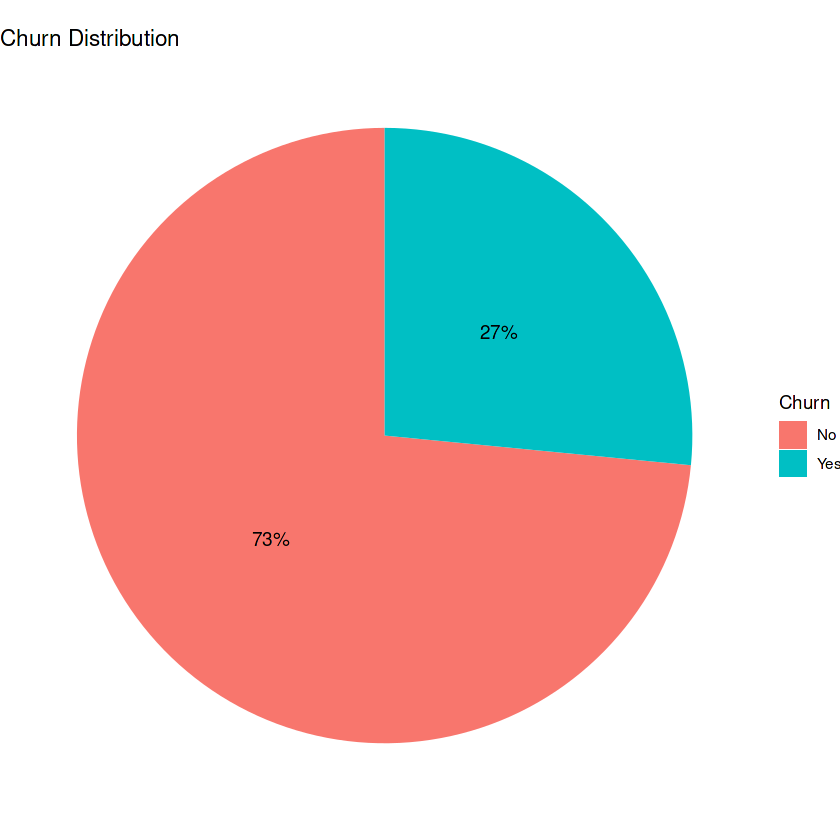

In [5]:
churn_counts <- table(churn_data$Churn)

churn_df <- as.data.frame(churn_counts)
names(churn_df) <- c("Churn", "Count")

ggplot(churn_df, aes(x = "", y = Count, fill = Churn)) +
  geom_bar(stat = "identity", width = 1) +
  coord_polar(theta = "y") +
  geom_text(aes(label = scales::percent(Count / sum(Count))), 
            position = position_stack(vjust = 0.5)) +
  ggtitle("Churn Distribution") +
  theme_void()

The pie chart shows the distribution of churn (whether a customer left or stayed). It helps us see the proportion of customers who churned versus those who didn’t.

3.2. Churn Distribution of Contract Status
* This bar plot shows how churn varies with respect to contract type (Month-to-month, One year, Two-year).

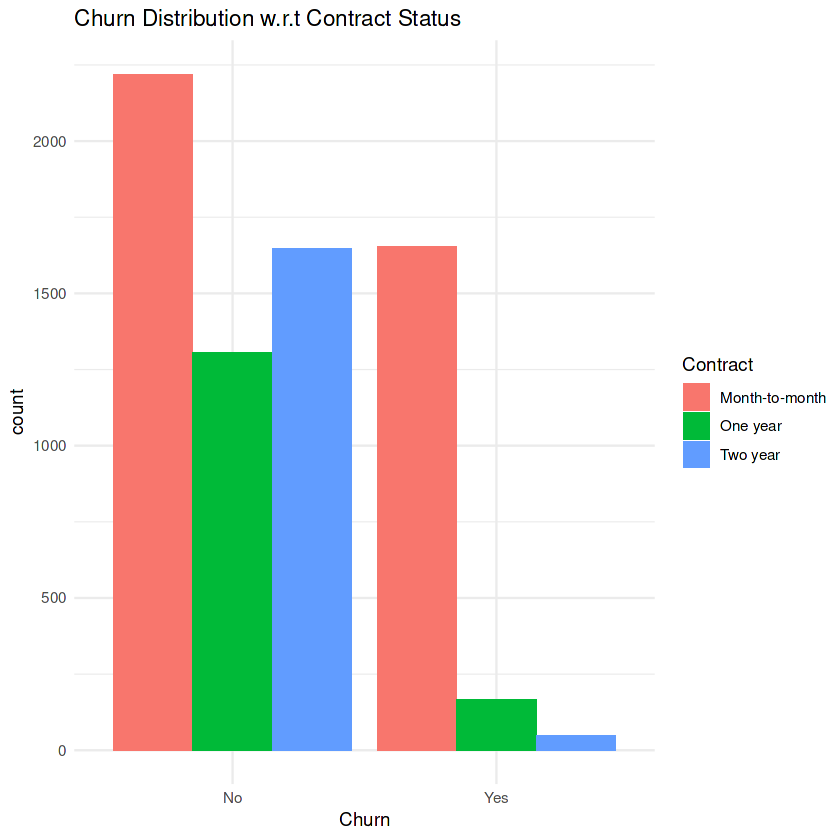

In [6]:
ggplot(churn_data, aes(x = Churn, fill = Contract)) +
  geom_bar(position = "dodge") +
  labs(title = "Churn Distribution w.r.t Contract Status", x = "Churn") +
  theme_minimal()

The bar chart here helps visualize whether different contract types (Month-to-month, One year and Two year) have an impact on customer churn. It uses side-by-side bars to make the comparison clear.

3.3. Churn Distribution of Tenure
* This bar chart shows the churn distribution in relation to the tenure (number of months a customer has been with the telecom company).

Warning message:
“`position_dodge()` requires non-overlapping x intervals.”


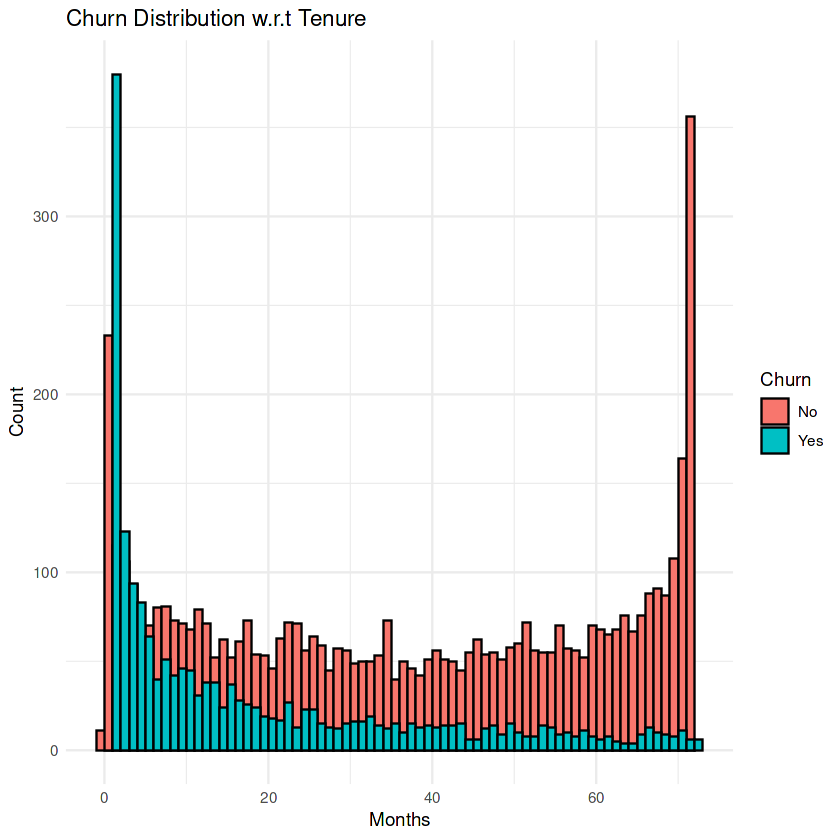

In [7]:
ggplot(churn_data, aes(x = tenure, fill = Churn)) +
  geom_bar(position = "dodge",width = 2,colour="black") +
  labs(title = "Churn Distribution w.r.t Tenure", x = "Months", y = "Count") +
  theme_minimal()

This visualization helps us understand how the number of months a customer has been with the telecom company correlates with the likelihood of churn.

3.4. Churn Distribution of Internet Services
* This bar plot shows the churn distribution in relation to the type of internet service used (DSL or Fiber optic).

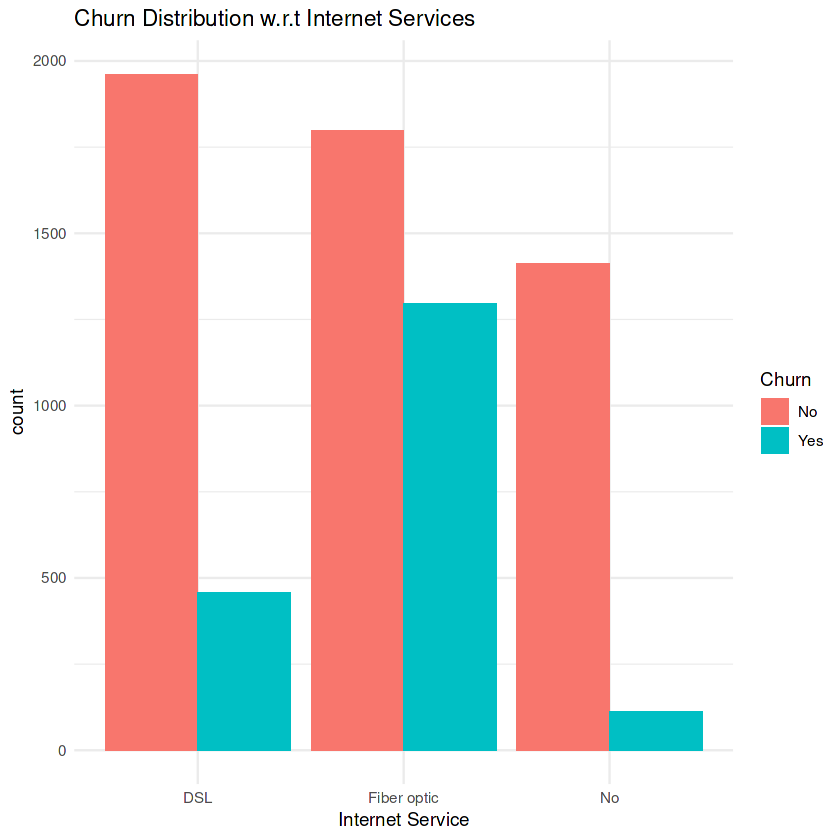

In [8]:
ggplot(churn_data, aes(x = InternetService, fill = Churn)) +
  geom_bar(position = "dodge") +
  labs(title = "Churn Distribution w.r.t Internet Services", x = "Internet Service") +
  theme_minimal()

This bar chart helps visualize whether the type of internet service (DSL vs. Fiber optic) impacts the churn rate.

3.5. Churn Based on Senior Citizen Status
* Identifying the number of senior citizens helps in tailoring services and promotions specifically for this segment. This bar plot compares the churn distribution between senior citizens and non-senior citizens.

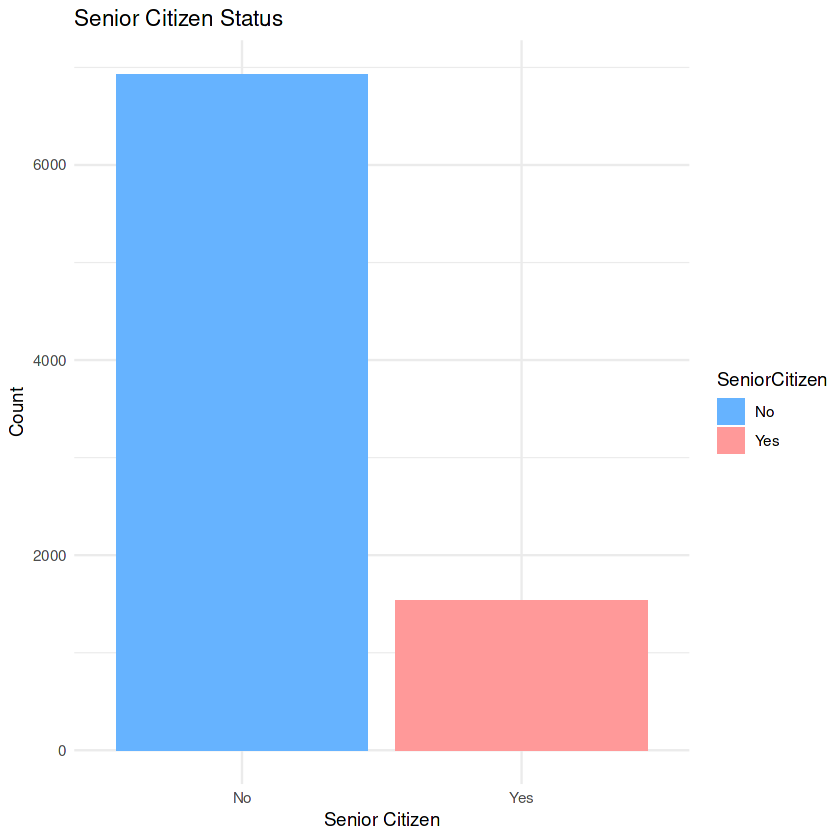

In [9]:
senior_data <- data.frame(
  SeniorCitizen = c("No", "Yes"),
  Count = c(6932, 1539)
)

ggplot(senior_data, aes(x = SeniorCitizen, y = Count, fill = SeniorCitizen)) +
  geom_bar(stat = "identity") +
  theme_minimal() +
  labs(title = "Senior Citizen Status", x = "Senior Citizen", y = "Count") +
  scale_fill_manual(values = c("No" = "#66B3FF", "Yes" = "#FF9999"))

This bar chart shows the number of senior citizens vs. non-senior citizens in the dataset, helping to tailor services specifically for this segment.

3.6. Churn Based on Payment Method
* Understanding how customers prefer to pay for services can inform billing and payment strategy. This bar plot shows the distribution of different payment methods used by customers.

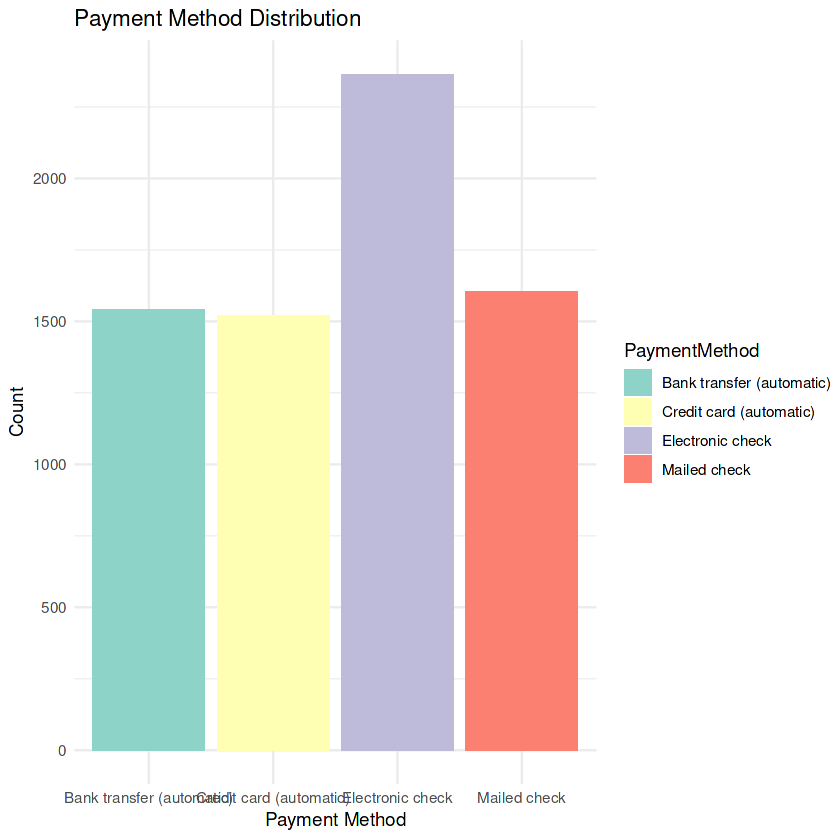

In [10]:
payment_data <- data.frame(
  PaymentMethod = c("Bank transfer (automatic)", "Credit card (automatic)",
                                                "Electronic check", "Mailed check"),
  Count = c(1542, 1521, 2365, 1604)
)

ggplot(payment_data, aes(x = PaymentMethod, y = Count, fill = PaymentMethod)) +
  geom_bar(stat = "identity") +
  theme_minimal() +
  labs(title = "Payment Method Distribution", x = "Payment Method", y = "Count") +
  scale_fill_brewer(palette = "Set3")

This bar chart visualizes the preferred payment methods among customers, helping telecom companies better understand customer behavior and billing preferences.

# Conclusion
From our analysis, we observed that:

* Month-to-month contracts are associated with higher churn, suggesting that offering longer-term contracts could improve retention.
* Newer customers with shorter tenures are at higher risk of churn, indicating the need for targeted retention strategies early in the subscription.
* DSL internet services show a higher churn rate compared to fiber optic services, highlighting the potential benefit of improving DSL quality or encouraging upgrades.
* Senior citizens have a lower churn rate, emphasizing the need for tailored services for non-senior citizens who are more likely to churn.
* Payment method preferences, especially the popularity of electronic checks, suggest opportunities for optimizing billing strategies.
* By addressing these factors, telecom companies can implement more effective retention strategies to reduce churn.